In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import arviz as az

In this notebook we'll be learning about two different, but not completely unrelated things. The first is the propagation of "error" (really, uncertainty) using an analytical approach. This section is called "Propagation of Uncertainty". The second section is about estimating the parameters of a relationship between two variables using Bayesian inference. This section is called "Estimating the Parameters of a Model relationship". I'll be using data from project 2 for this.

## Propagation of Uncertainty

Suppose we want to measure $g$, the strength of the gravitational field, using only a meter stick and a stopwatch.

Let's drop a ball from a height of 2m and measure how long it takes to hit the ground. According to the basic kinematics you learned in PHYS 153 that should be:

$$ h = 0.5 g t^2 $$

so

$$ t = \sqrt{\frac{2h}{g}} $$

If you're located at a place where $g=9.8\,{\rm N/kg}$ that would be:

$$ t = \sqrt{\frac{2 \cdot 2{\rm m}}{9.8\,{\rm N/kg}}} \approx 0.639\,{\rm sec}$$

Suppose we measured the time for 10 drops and get a mean of 0.64 sec with a standard error (of the mean) of 0.02 sec. Suppose further that we measure the height to within 0.5 cm. With what accuracy do we know $g$?

This problem is called "error propagation". For a single variable you'd use the slope of the functional relationship between output (g) and input (t) to find the relationahip. So, let's look at that.

$$ g = \frac{2h}{t^2} $$

so in the neighborhood of $r=0.64\,{\rm sec}$ that's:

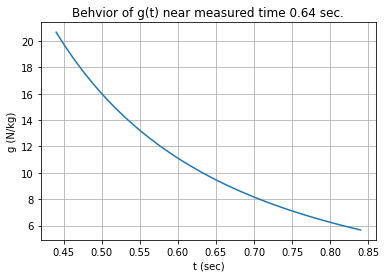

In [2]:
t=np.linspace(0.64-.2, 0.64+0.2, 100)
h=2.0

def g(t,h):
    return 2*h/t**2

plt.plot(t, g(t,h))
plt.title("Behvior of g(t) near measured time 0.64 sec.")
plt.xlabel("t (sec)")
plt.ylabel("g (N/kg)")
plt.grid()


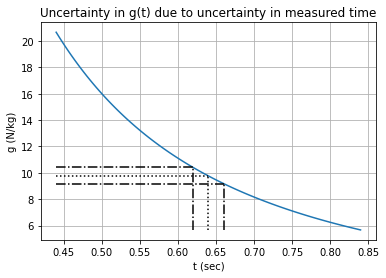

In [3]:
plt.title("Uncertainty in g(t) due to uncertainty in measured time")
plt.xlabel("t (sec)")
plt.ylabel("g (N/kg)")
plt.plot(t, g(t,h))

plt.plot((0.64-0.02,0.64-0.02), (g(t[-1],h),g(0.64-0.02,h)), 'k-.')
plt.plot((0.64+0.02,0.64+0.02), (g(t[-1],h),g(0.64+0.02,h)), 'k-.')
plt.plot((0.64,0.64), (g(t[-1],h),g(0.64,h)), 'k:')
plt.plot((t[0],0.64-0.02), (g(0.64-0.02,h),g(0.64-0.02,h)), 'k-.')
plt.plot((t[0],0.64+0.02), (g(0.64+0.02,h),g(0.64+0.02,h)), 'k-.')
plt.plot((t[0],0.64), (g(0.64,h),g(0.64,h)), 'k:')
plt.grid()


You can see that it's the *slope* of the $g(t)$ function at the time measured that determines the relationship between the uncertainty in $t$ (called $\sigma_t$) and the uncertainty in $g$ (called $\sigma_g$):

$$ \sigma_g = \left|\frac{\partial g}{\partial t}\right|\,\sigma_t $$

In this example the slope of $g(t)$ is:

$$\frac{\partial g}{\partial t} = -\frac{4 h}{t^3} $$

Which makes:

$$ \sigma_g = \left|-\frac{4 h}{t^3}\right|\,\sigma_t $$

But notice that, aside from a sign, the derivative is:

$$\left|\frac{\partial g}{\partial t}\right| = 2\frac{g(t)}{t} $$

In other words:

$$ \frac{\sigma_g}{g} = 2\frac{\sigma_t}{t} $$

Or, in words: Because $t$ is raised to the second power, the fractional error (think percent error) in $g$ is *double* the fractional error of $t$.

This works for *any* power law.

# Combining uncertainty from multiple variables

If you have more than one variable contributing to the uncertainty in a calculation the *combined* uncertainty is calculated as the square root of the sum of the squares of the contribution from each item. Suppose you had a quantity $d$ that was related to quantities $a$, $b$ and $c$ in some arbitrary way so that $d$ was a function of $a$, $b$ and $c$. You could compute the uncertainty in $d$ as:

$$ \sigma_d^2 =  \left ( \frac{\partial d}{\partial a} \sigma_a \right)^2 + \left ( \frac{\partial d}{\partial b} \sigma_b \right)^2 + \left ( \frac{\partial d}{\partial c} \sigma_c \right)^2 $$

This is the general rule, but there are some special cases, like power laws. Suppose, for example, you had a quantity $d$ that was related to quantities $a$, $b$ and $c$ by a power law relationship like:

$$ d = a^n b^m c^p $$

Using this idea you can simplify this situation as:

$$ \left ( \frac{\sigma_d}{d} \right)^2 =  \left ( n \frac{\sigma_a}{a} \right)^2 + \left ( m \frac{\sigma_b}{b} \right)^2 + \left ( p \frac{\sigma_c}{c} \right)^2$$

Note that our gravity example is a power law relationship with $h$ having power 1 and $t$ having power 2.

Let's try this out with our data. Since:

$$ g = \frac{2h}{t^2} = \frac{2\times 2.0\,{\rm m}}{(0.64\,{\rm sec})^2} = 9.765\,{\rm m/sec^2}$$

By the pattern above we have:

$$ \left ( \frac{\sigma_g}{g} \right)^2 =  \left ( 1 \frac{\sigma_h}{h} \right)^2 + \left ( 2 \frac{\sigma_t}{t} \right)^2 $$

We were given above: Suppose we measured the time for 10 drops and get a mean of 0.64 sec with a standard error (of the mean) of 0.02 sec. Suppose further that we measure the height to within 0.5 cm. With what accuracy do we know $g$?

So:

$$ \left ( \frac{\sigma_g}{g} \right)^2 =  \left ( \frac{0.5\,{\rm cm}}{200\,{\rm cm}} \right)^2 + \left ( 2\times \frac{0.02\,{\rm sec}}{0.64\,{\rm sec}} \right)^2  = \left ( \frac{1}{400} \right)^2 + \left (\frac{1}{16} \right)^2 \approx \left (\frac{1}{16} \right)^2 $$

This last approximation is justified because (1/16) is so much larger than (1/400), particularly when combined in quadrature, which means we should expect no better than a fractional error of 6% or so (1/16) and it's all from the uncertainty in the time. Improving the height measurement will do little or nothing to improve the result unless we can drastically reduce the uncertainty in time. To compute the *actual* uncertainty in $g$ we need to multiply:

$$\sigma_g = g \times \left (\frac{1}{16} \right) \approx 0.63\,{\rm m/s^2}$$


# Exercise 1

Suppose you want to cut out material for a thermal cover for an orbiting satellite. You want to estimate the uncertainty of the area (and hence mass) of the cover based on the precision with whcih you can measure the width and length of the cut. Suppose it's a 1-m x 1-m area with a precision of width and height each of +/- 0.5 cm. Use the ideas from propagation of uncertainty to estimate the uncertainty in the area.


## Estimating the Parameters of another Model relationship

Just like we use Bayesian analysis to determine the trend from our example time series, we can also use it to find parameters of any model, even if it's not linear:

Text(0.5, 1.0, 'Generative model with noise')

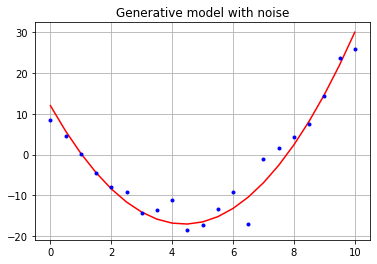

In [4]:
N = 21
noiseLevel = 5
x = np.linspace(0,10,N)

A = 1.5
B = -13.2
C = +12

noise = np.random.normal(size=N)*noiseLevel

yth = A*x**2 + B*x + C
ynoise = yth + noise

plt.plot(x,yth,'r-', x, ynoise,'b.' )
plt.grid()
plt.title("Generative model with noise")


In [5]:
with pm.Model() as noise_model:
    
    Am = pm.Uniform("Am",0,5)
    Bm = pm.Uniform("Bm",-20,20)
    Cm = pm.Uniform("Cm",-20,20)
    sigma = pm.Uniform("sigma", 0, 20)
    
    yObsModel = Am*x**2 + Bm*x + Cm
    
    yobs = pm.Normal("yobs", mu=yObsModel, sigma=sigma, observed=ynoise )
    
    trace =pm.sample(1000, return_inferencedata=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Cm, Bm, Am]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%
Am,1.350,0.089,1.169,1.510
Bm,-11.618,0.926,-13.421,-9.887
Cm,9.732,1.974,6.218,13.746
sigma,3.224,0.589,2.312,4.303


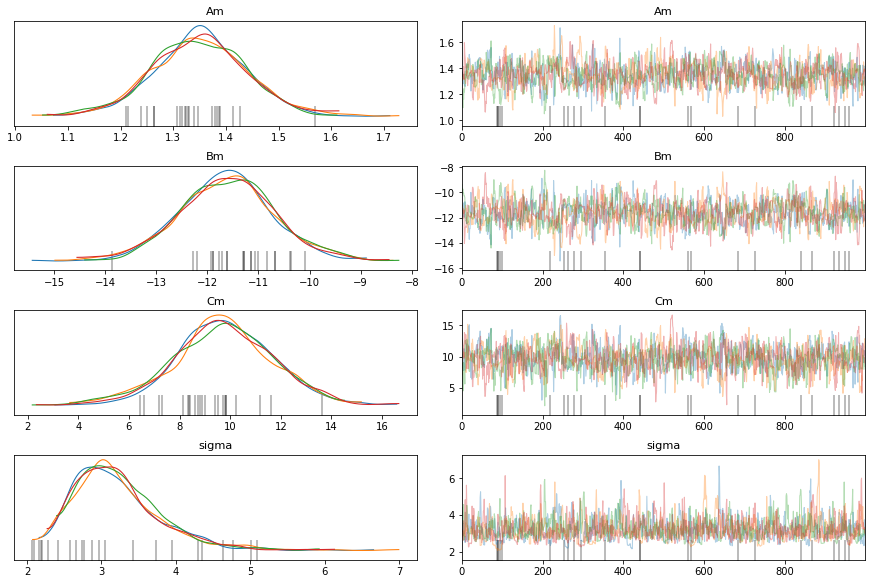

In [6]:
az.plot_trace(trace)
az.summary(trace, kind="stats")

While there's still quite a lot of uncertainty, the regions of credibility are certainly consistent with our generative model!

## Exercise 2

Suppose you're measuring a damped vibration that you expect to follow a model like this:

$$ y(t) = A \sin(\omega t + \phi) e^{-t/\tau}$$

Write a generative model, in the same manner as described above, using $A=2$, $\omega=3$, $\phi=0.5$, and $\tau=4$ with a `noiseLevel` of 0.1. Let $t$ be an array with 200 values between 0 and 20. Use Bayesian inference to extract those parameters from the data produced by your generative model.